In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
x = data[['YearsExperience']].values
y = data['Salary'].values

In [ ]:
### the shape of feature should be (no.of samples,no.of feature) - 2 Dimension i.e. (30,1)

In [ ]:
#x = data.iloc[:,0].values.reshape(len(data),1)
#y = data.iloc[:,1].values

In [ ]:
len(data)

30

In [ ]:
### Split the data into training and testing samples
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.80,random_state=200)

In [ ]:
xtest

array([[ 8.7],
       [10.5],
       [ 1.5],
       [ 7.9],
       [ 1.1],
       [ 5.9]])

In [ ]:
### Build the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
### Train the model
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
### Test the model
ypred = model.predict(xtest)
ypred

array([108335.56338618, 125509.79795421,  39638.62511404, 100702.57024483,
        35822.12854337,  81620.08739146])

In [ ]:
ytest

array([109431., 121872.,  37731., 101302.,  39343.,  81363.])

In [ ]:
xtest

array([[ 8.7],
       [10.5],
       [ 1.5],
       [ 7.9],
       [ 1.1],
       [ 5.9]])

In [ ]:
### Calculate R-Square
from sklearn.metrics import r2_score
score = r2_score(ytest,ypred)
score

0.9952429110093546

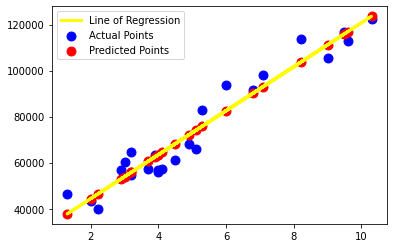

In [ ]:
### Draw line of regression (Training Samples)
plt.scatter(xtrain,ytrain,color="blue",label="Actual Points",s=80)
plt.scatter(xtrain,model.predict(xtrain),color="red",label="Predicted Points",s=80)
plt.plot(xtrain,model.predict(xtrain),color='yellow',lw=3,label="Line of Regression")
plt.legend()
plt.show()

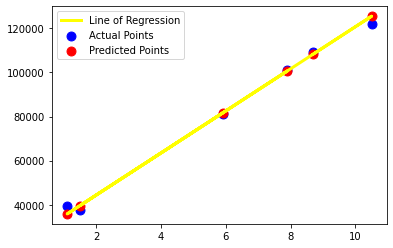

In [ ]:
### Draw line of regression (Testing Samples)
plt.scatter(xtest,ytest,color="blue",label="Actual Points",s=80)
plt.scatter(xtest,model.predict(xtest),color="red",label="Predicted Points",s=80)
plt.plot(xtest,model.predict(xtest),color='yellow',lw=3,label="Line of Regression")
plt.legend()
plt.show()

In [ ]:
accuracy = []
for i in range(501):
  xtrain_1,xtest_1,ytrain_1,ytest_1 = train_test_split(x,y,train_size=0.80,random_state=i)
  model_1 = LinearRegression()
  model_1.fit(xtrain_1,ytrain_1)
  ypred_1 = model_1.predict(xtest_1)
  score_1 = r2_score(ytest_1,ypred_1)
  accuracy.append(score_1)

In [ ]:
import numpy as np
print(np.max(accuracy))
print(np.argmax(accuracy))

0.9952429110093546
200


In [ ]:
model.predict([[15]])[0]

168445.38437429562

In [ ]:
def salary():
  exp = float(input("Enter Work Experience in Years:"))
  sal = model.predict([[exp]])
  print("The expected salary would be "+str(round(sal[0],2)))

In [ ]:
salary()

Enter Work Experience in Years:7.5
The expected salary would be 96886.07


In [ ]:
import joblib
joblib.dump(model,"salary.pkl")

['salary.pkl']

In [ ]:
mymodel = joblib.load("/content/salary.pkl")

In [ ]:
round(mymodel.predict([[15]])[0],2)

168445.38